# Loading Data 

The first step in any machine learning endeavor is to get the raw data into our system. The raw data might be a logfile, dataset file, or database. Furthermore, often we will want to retrieve data from multiple sources. The recipes in this chapter look at methods of loading data from a variety of sources, including CSV files and SQL databases. We also cover methods of generating simulated data with desirable properties for experimentation. Finally, while there are many ways to load data in the Python ecosystem, we will focus on using the pandas library’s extensive set of methods for loading external data, and using scikit-learn—an open source machine learning library in Python—for generating simulated data.

In [33]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Loading a Sample Dataset From Scikit Learn

Scikit-learn comes with some common datasets we can quickly load. These datasets are often called “toy” datasets because they are far smaller and cleaner than a dataset we would see in the real world. Some popular sample datasets in scikit-learn are:
- **Load Boston:** Contains 503 observations on Boston housing prices. It is a good dataset for exploring regression algorithms.
- **Load Iris:** Contains 150 observations on the measurements of Iris flowers. It is a good dataset for exploring classification algorithms.
- **Load Digits:** Contains 1,797 observations from images of handwritten digits. It is a good dataset for teaching image classification and so on.

To Learn More [Visit Here](https://scikit-learn.org/stable/datasets/index.html#toy-datasets)

In [11]:
from sklearn import datasets
# Load digits dataset
digits = datasets.load_digits()

# Create features matrix
features = digits.data

# Create target vector
target = digits.target

# View first observation
features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

# Creating a Simulated Dataset
Scikit-learn offers many methods for creating simulated data. Of those, three methods
are particularly useful.
When we want a dataset designed to be used with linear regression, make_regression
is a good choice:

In [18]:
from sklearn.datasets import make_regression

# Generate features matrix, target vector, and the true coefficients
features, target, coefficients = make_regression(n_samples = 100,
                                                 n_features = 3,
                                                 n_informative = 3,
                                                 n_targets = 1,
                                                 noise = 0.0,
                                                 coef = True,
                                                 random_state = 1
                                                )

In [20]:
print('Feature Matrix\n', features[:3])

print('Target Vector\n', target[:3])

Feature Matrix
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
Target Vector
 [-10.37865986  25.5124503   19.67705609]


If we are interested in creating a simulated dataset for classification, we can use
make_classification :

In [28]:
# Load library
from sklearn.datasets import make_classification
# Generate features matrix and target vector
features, target = make_classification(n_samples = 100,
                                       n_features = 3,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.25, .75],
                                       random_state = 1
                                      )

# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
Target Vector
 [1 0 0]


Finally, if we want a dataset designed to work well with clustering techniques, scikit-
learn offers make_blobs :

In [34]:
# Load library
from sklearn.datasets import make_blobs
# Generate feature matrix and target vector
features, target = make_blobs(n_samples = 100,
                              n_features = 2,
                              centers = 3,
                              cluster_std = 0.5,
                              shuffle = True,
                              random_state = 1
                             )
# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
Target Vector
 [0 1 1]


### Discussion
As might be apparent from the solutions, **make_regression** returns a feature matrix
of float values and a target vector of float values, while make_classification and
make_blobs return a feature matrix of float values and a target vector of integers rep‐
resenting membership in a class.

scikit-learn’s simulated datasets offer extensive options to control the type of data
generated. scikit-learn’s documentation contains a full description of all the parame‐
ters, but a few are worth noting.

In make_regression and make_classification , n_informative determines the
number of features that are used to generate the target vector. If n_informative is less
than the total number of features ( n_features ), the resulting dataset will have redun‐
dant features that can be identified through feature selection techniques.

In addition, make_classification contains a weights parameter that allows us to
simulate datasets with imbalanced classes. For example, weights = [.25, .75]
would return a dataset with 25% of observations belonging to one class and 75% of
observations belonging to a second class.

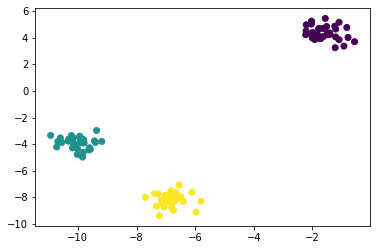

In [35]:
# View scatterplot
plt.scatter(features[:,0], features[:,1], c=target)
plt.show()

# Load CSV File

In [70]:
# Create URL
url = 'dataset/circle_employee.csv'
print(url)
# # Load dataset
dataframe = pd.read_csv(url)

# View first two rows
dataframe.head()

dataset/circle_employee.csv


,id,name,age,blood_group,gender,experience,designation,salary
0,1,Sharif,NaN,B+,male,1.5,Jr Software Engineer,30000
1,2,Kanan Mahmud,28.0,NaN,Male,7.5,Sr Software Engineer,80000
2,3,Md. Shakil,27.0,B-,Male,3.5,Software Engineer,45000
3,4,Imran Sheikh,25.0,B-,Male,1.8,Jr Software Engineer,30000
4,5,Farsan Rashid,27.0,O+,Male,4.2,Software Engineer,55000


# Load Excel File

In [69]:
# Create URL
url = 'dataset/Chapter2OnlineData.xls'
# Load data
dataframe = pd.read_excel(url,)
dataframe.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Load JSON File

In [67]:
# Create URL
url = 'dataset/data.json'

# Load data
dataframe = pd.read_json(url, orient='columns')
dataframe.head()

,name,Age,Blood_Group,Nationality
0,Sharif,26,B+,Bangladeshi
1,Imran,25,B+,Bangladeshi
2,Akib,24,AB+,Bangladeshi
3,Hanif,26,A+,Bangladeshi


# Querying a SQL Database

In [ ]:
from sqlalchemy import create_engine

# Create a connection to the database
database_connection = create_engine('sqlite:///sample.db')

# Load data
dataframe = pd.read_sql_query('SELECT * FROM data', database_connection)

# View first two rows
dataframe.head(2)